In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
PredictInfected = pd.read_csv('PredictInfected.csv')

In [3]:
PredictInfected

,Unnamed: 0,positive%,dead%,"ICU Beds per 10,000 Population","Hospital Beds per 10,000 Population",Share of Private Sector Enrollees in Enrolled in Self-Insured Plans,"Critical Care Nurses and CRNAs per 10,000 Adults",American Indian/Alaska Native,"Older adults, as a share of all at-risk adults","Total 2nd-Line Critical Care Physicians* per 10,000 Adults",Median Household Income 2020,Median Household Income 2021,Multiple Races,Asian
0,0,7.756572,0.041588,1.8,22.6,0.566,2.54,0.151,0.494,4.37,74746,81133,0.083,0.060
1,367,9.948074,0.201979,3.9,31.6,0.549,5.07,0.004,0.510,3.48,54689,56929,0.019,0.014
2,733,10.785835,0.176622,2.9,28.6,0.629,3.19,0.006,0.503,3.58,50777,50784,0.024,0.016
3,1100,11.556370,0.228316,2.5,18.4,0.631,1.46,0.039,0.591,5.23,67088,70821,0.024,0.033
4,1469,8.855719,0.136890,2.1,19.2,0.434,0.89,0.004,0.560,4.43,77652,81575,0.033,0.147
5,1838,7.561892,0.103729,3.2,17.5,0.612,1.77,0.005,0.591,5.18,83777,84954,0.028,0.032
6,2207,7.912768,0.213647,2.1,23.4,0.599,2.66,0.002,0.599,6.08,79432,80958,0.026,0.046
7,2580,8.925115,0.148796,2.7,20.4,0.659,4.99,0.003,0.583,4.93,70022,68687,0.028,0.039
8,2947,9.554666,0.167160,2.6,23.2,0.652,2.45,0.002,0.509,3.99,59265,61497,0.025,0.041
9,3316,1.972073,0.030578,1.6,20.9,0.314,1.09,0.001,0.625,4.19,80825,82199,0.184,0.394


In [38]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(PredictInfected['positive%'])
X = pd.DataFrame(PredictInfected[['Asian', 'Multiple Races',
       'Older adults, as a share of all at-risk adults',
       'Total 2nd-Line Critical Care Physicians* per 10,000 Adults',
       'Critical Care Nurses and CRNAs per 10,000 Adults',
       'Share of Private Sector Enrollees in Enrolled in Self-Insured Plans',
       'Hospital Beds per 10,000 Population', 'ICU Beds per 10,000 Population',
       'dead%', 'Median Household Income 2020']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (39, 10) (39, 1)
Test Set  : (10, 10) (10, 1)


LinearRegression()

In [39]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

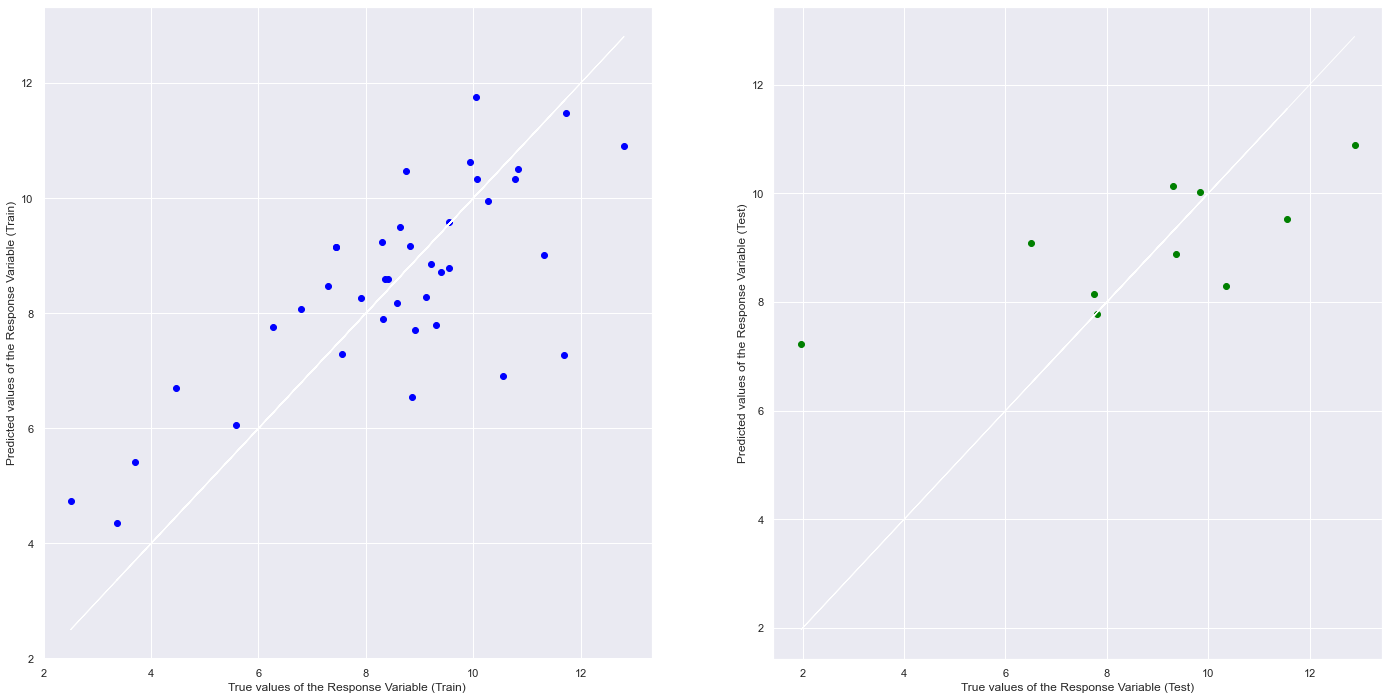

In [40]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error

print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.5642262662475908
Mean Squared Error (MSE) on Train Set 	: 2.237661296695068
Mean Squared Error (MSE) on Test Set 	: 4.776292124355596


In [4]:
PredictDead = pd.read_csv('PredictDead.csv')

In [5]:
PredictDead

,Unnamed: 0,dead%,positive%,Black,longitude,"Hospital Beds per 10,000 Population","ICU Beds per 10,000 Population",death,positiveIncrease,Pneumonia Deaths,Total Hospital Beds,"Intensivist (Critical Care) Physicians per 10,000 Adults",positive,latitude,Asian,area,Median Household Income 2021,Multiple Races,recoveryRate
0,0,0.041588,7.756572,0.022,-154.493062,22.6,1.8,305.0,0,47.0,1604.0,0.51,56886.0,63.588753,0.060,663267,81133,0.083,99.463840
1,367,0.201979,9.948074,0.265,-86.902298,31.6,3.9,10148.0,408,1085.0,15035.0,0.41,499819.0,32.318231,0.014,52419,56929,0.019,97.969665
2,733,0.176622,10.785835,0.152,-91.831833,28.6,2.9,5319.0,165,529.0,8353.0,0.29,324818.0,35.201050,0.016,53179,50784,0.024,98.362468
3,1100,0.228316,11.556370,0.043,-111.093731,18.4,2.5,16328.0,1335,903.0,12875.0,0.56,826454.0,34.048928,0.033,113998,70821,0.024,98.024330
4,1469,0.136890,8.855719,0.053,-119.417932,19.2,2.1,54124.0,3816,5672.0,74286.0,0.63,3501394.0,36.778261,0.147,163695,81575,0.033,98.454216
5,1838,0.103729,7.561892,0.038,-105.782067,17.5,3.2,5989.0,840,417.0,9737.0,0.75,436602.0,39.550051,0.032,104093,84954,0.028,98.628270
6,2207,0.213647,7.912768,0.100,-73.087749,23.4,2.1,7704.0,0,593.0,8102.0,0.98,285330.0,41.603221,0.046,5544,80958,0.026,97.299968
7,2580,0.148796,8.925115,0.218,-75.527670,20.4,2.7,1473.0,215,136.0,1916.0,0.61,88354.0,38.910832,0.039,2489,68687,0.028,98.332843
8,2947,0.167160,9.554666,0.313,-82.907123,23.2,2.6,17906.0,1709,1287.0,23692.0,0.56,1023487.0,32.157435,0.041,59425,61497,0.025,98.250491
9,3316,0.030578,1.972073,0.012,-155.665857,20.9,1.6,445.0,53,513.0,2835.0,0.45,28699.0,19.898682,0.394,10931,82199,0.184,98.449423


In [6]:
for col in PredictDead.columns: 
    print(col, PredictDead[col].isna().sum())

Unnamed: 0 0
dead% 0
positive% 0
Black 0
longitude 0
Hospital Beds per 10,000 Population 0
ICU Beds per 10,000 Population 0
death 0
positiveIncrease 0
Pneumonia Deaths 0
Total Hospital Beds 0
Intensivist (Critical Care) Physicians per 10,000 Adults 0
positive 0
latitude 0
Asian 0
area 0
Median Household Income 2021 0
Multiple Races 0
recoveryRate 0


In [12]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(PredictDead['dead%'])
X = pd.DataFrame(PredictDead[[ 'Multiple Races', 'area', 'Asian', 'latitude',
       'positive', 'Total Hospital Beds',
       'Pneumonia Deaths',
       'Intensivist (Critical Care) Physicians per 10,000 Adults',
       'positiveIncrease', 'Hospital Beds per 10,000 Population',
       'ICU Beds per 10,000 Population', 'longitude', 'Black', 'positive%']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (39, 14) (39, 1)
Test Set  : (10, 14) (10, 1)


LinearRegression()

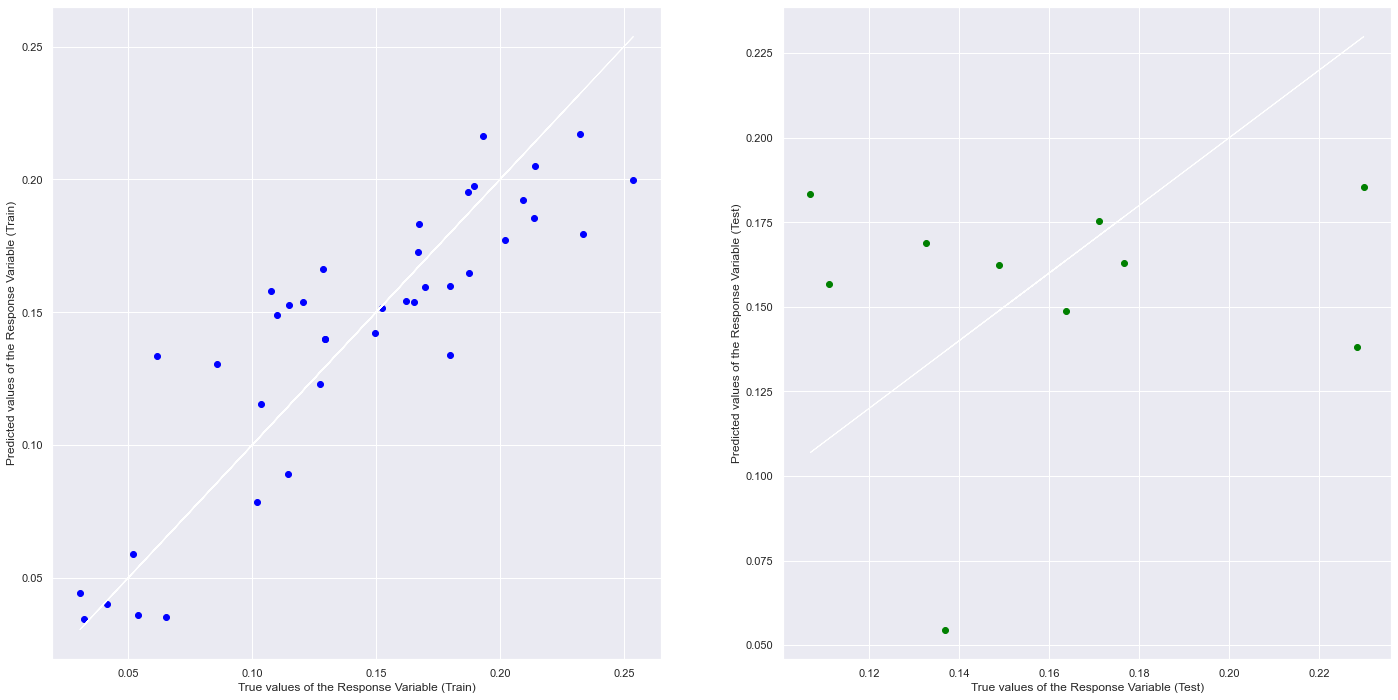

In [13]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.776964788022815
Mean Squared Error (MSE) on Train Set 	: 0.000779130221936889
Mean Squared Error (MSE) on Test Set 	: 0.0026729241636488208


In [7]:
PredictPositiveIncrease = pd.read_csv('PredictPositiveIncrease.csv')

In [8]:
PredictPositiveIncrease

,state,"Hospital Beds per 10,000 Population","ICU Beds per 10,000 Population","Critical Care Nurses and CRNAs per 10,000 Adults",Share of Private Sector Enrollees in Enrolled in Self-Insured Plans,American Indian/Alaska Native,positive%,dead%,recoveryRate,positiveIncrease%
0,AK,22.6,1.8,2.54,0.566,0.151,2.358655,0.011698,98.931342,0.000211
1,AL,31.6,3.9,5.07,0.549,0.004,3.374996,0.057723,97.973489,0.000272
2,AR,28.6,2.9,3.19,0.629,0.006,3.404048,0.056910,98.426749,0.000294
3,AZ,18.4,2.5,1.46,0.631,0.039,3.617576,0.074516,97.529095,0.000313
4,CA,19.2,2.1,0.89,0.434,0.004,2.598429,0.040167,97.838065,0.000240
5,CO,17.5,3.2,1.77,0.612,0.005,2.319347,0.043707,96.981117,0.000205
6,CT,23.4,2.1,2.66,0.599,0.002,2.547283,0.124141,93.716892,0.000212
7,DE,20.4,2.7,4.99,0.659,0.003,2.812918,0.063204,96.998191,0.000243
8,GA,23.2,2.6,2.45,0.652,0.002,3.124429,0.060919,97.465094,0.000259
9,HI,20.9,1.6,1.09,0.314,0.001,0.725388,0.010575,98.450974,0.000053


In [9]:
PredictPositiveIncrease['positiveIncrease%'] = PredictPositiveIncrease['positiveIncrease%']*100  

In [10]:
PredictPositiveIncrease.columns

Index(['state', 'Hospital Beds per 10,000 Population',
       'ICU Beds per 10,000 Population',
       'Critical Care Nurses and CRNAs per 10,000 Adults',
       'Share of Private Sector Enrollees in Enrolled in Self-Insured Plans',
       'American Indian/Alaska Native', 'positive%', 'dead%', 'recoveryRate',
       'positiveIncrease%'],
      dtype='object')

In [11]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(PredictPositiveIncrease['positiveIncrease%'])
X = pd.DataFrame(PredictPositiveIncrease[['Hospital Beds per 10,000 Population',
       'ICU Beds per 10,000 Population',
       'Critical Care Nurses and CRNAs per 10,000 Adults',
       'Share of Private Sector Enrollees in Enrolled in Self-Insured Plans',
       'positive%', 'dead%', 'recoveryRate']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (38, 7) (38, 1)
Test Set  : (10, 7) (10, 1)


LinearRegression()

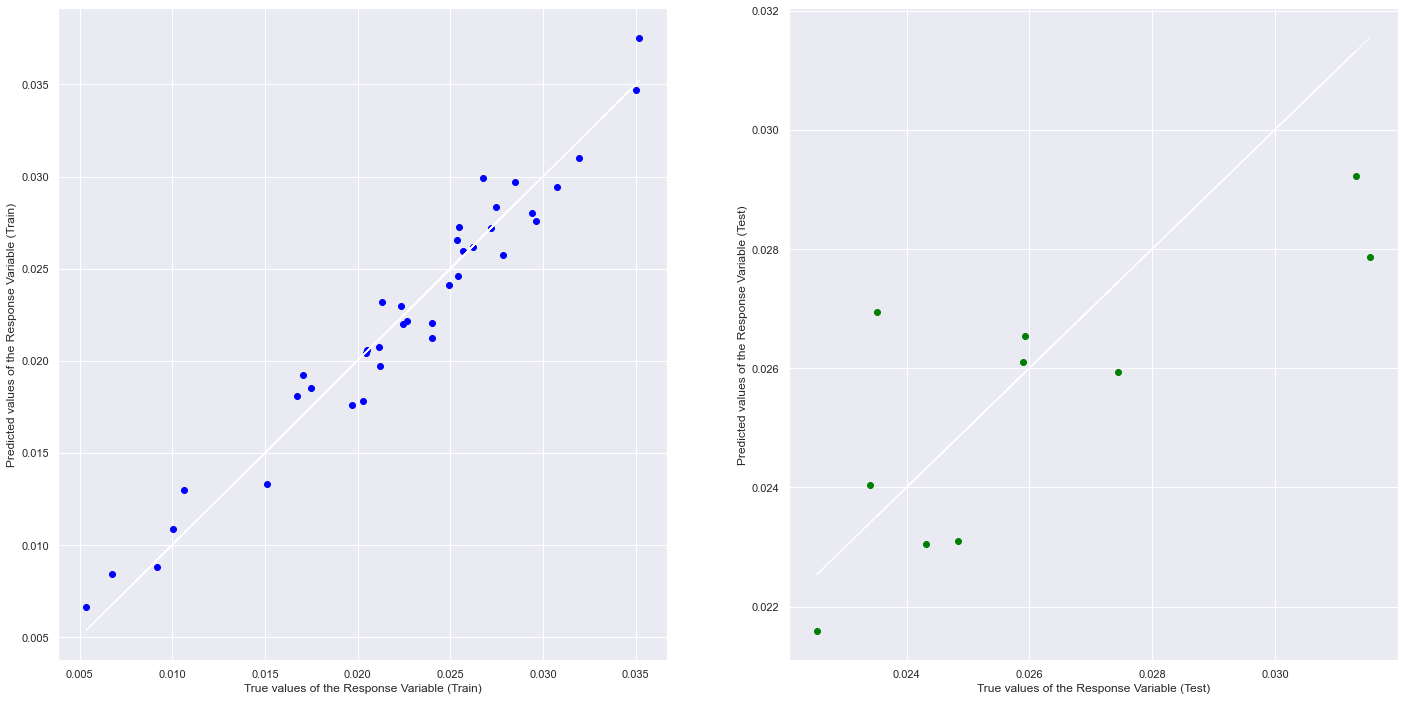

In [12]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.9550301022460643
Mean Squared Error (MSE) on Train Set 	: 2.3019908764033326e-06
Mean Squared Error (MSE) on Test Set 	: 3.831975053950266e-06


Given the findings of the linear regression results that is shown above, the model prediction does not appear to be reliable given the small number of data points have been used. 